# Credit Card Fraud Detection

## Importing all required libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

## Load the dataset:

In [2]:
df= pd.read_csv(r"C:\Users\hp\Downloads\Skillytixs\creditcard.csv")

In [3]:
# Check first 5 rows from dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Check last 5 rows from dataset
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
# Check shape
print(df.shape)

(284807, 31)


In [6]:
# Check structure of dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# Check duplicates
df.duplicated().sum()

1081

In [8]:
# Remove duplicates
df = df.drop_duplicates()

In [9]:
df.duplicated().sum()

0

In [10]:
# Check missing values
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [11]:
# Normalize Amount
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])

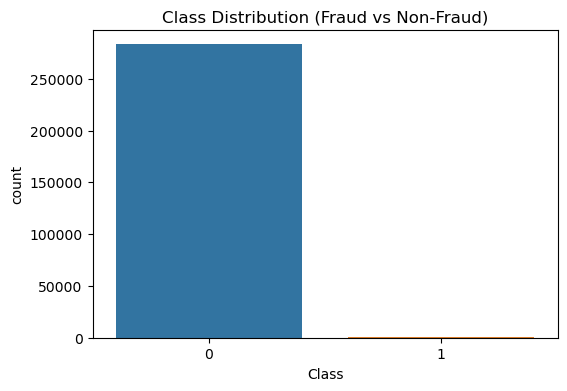

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(x="Class", data=df)
plt.title("Class Distribution (Fraud vs Non-Fraud)")
plt.show()


## Insights:
### The dataset exhibits a severe class imbalance. The number of normal transactions (Class 0) is overwhelmingly larger than the number of fraudulent transactions (Class 1). This is a common characteristic of fraud detection datasets.

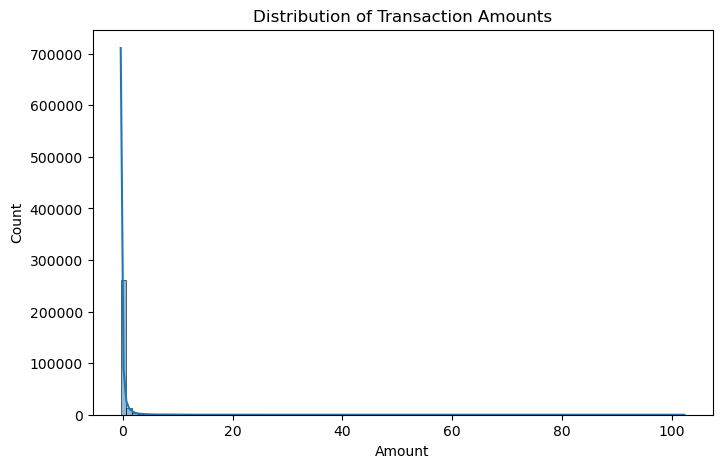

In [13]:
# Transaction Amount Distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Amount"], bins=100, kde=True)
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Amount")
plt.show()

## Insights:
### ● The distribution of transaction amounts is highly skewed to the right (positively skewed).
### ● The majority of transactions occur at very small amounts (close to 0–10 units).
### ● Only a small fraction of transactions involve large amounts, making them rare outliers.
### ● This skewness indicates that feature scaling may be required before modeling.
### ● Since most transactions are small, fraud analysis should also consider whether fraudulent transactions cluster in lower amounts compared to non-fraud.

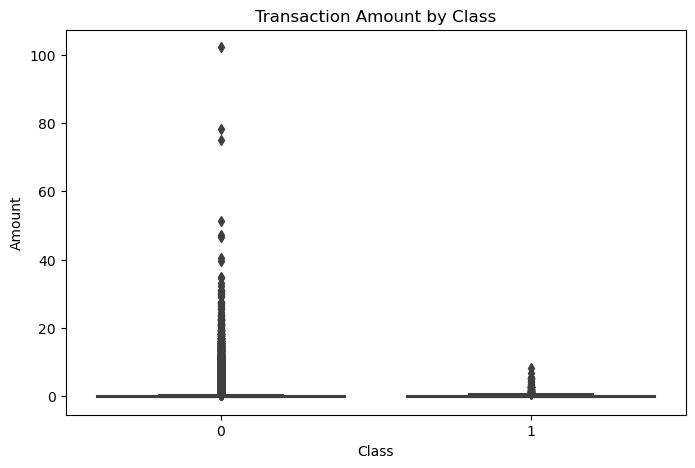

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Class", y="Amount", data=df)
plt.title("Transaction Amount by Class")
plt.show()


## Insights:
### ● Normal Transactions (Class 0): The majority of normal transactions have very low values, but there are a significant number of high-value outliers.

### ● Fraudulent Transactions (Class 1): The fraudulent transactions are concentrated at much lower values, with none reaching the high amounts seen in normal transactions.

### ● This insight suggests that transaction amount can be a strong predictor of fraud.

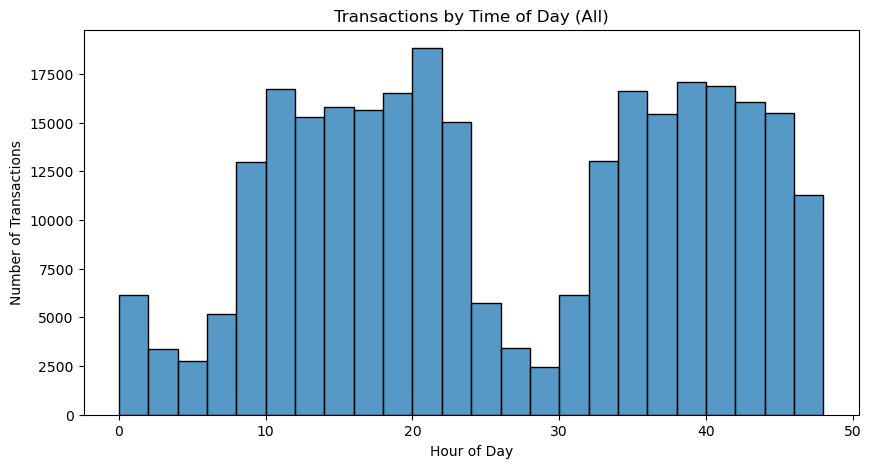

In [15]:
# Extract additional features
df['Hour'] = df['Time'] / 3600.0

# Plot transactions by hour
plt.figure(figsize=(10,5))
sns.histplot(df["Hour"], bins=24, kde=False)
plt.title("Transactions by Time of Day (All)")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Transactions")
plt.show()

## Insights:

### ● This chart shows the distribution of all transactions throughout the day.

### ● There is a clear pattern where the number of transactions is lowest during the early morning hours, specifically from 2 AM to 6 AM.

### ● Transaction activity significantly increases during business hours, from around 8 AM to 9 PM.

### ● The chart shows peaks in activity around midday and late evening.

### ● This provides a baseline of normal user behavior, which is useful for comparing against fraudulent activity.

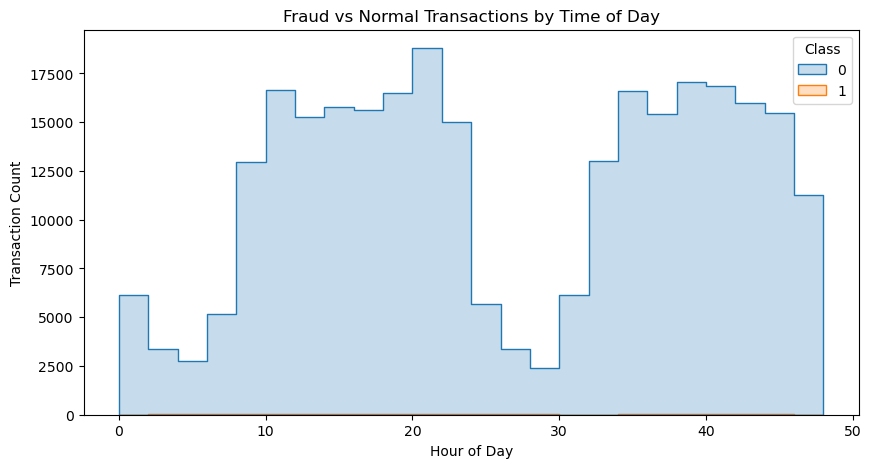

In [16]:
# Compare fraud vs normal over time
plt.figure(figsize=(10,5))
sns.histplot(data=df, x="Hour", hue="Class", bins=24, element="step", stat="count")
plt.title("Fraud vs Normal Transactions by Time of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Transaction Count")
plt.show()

## Insights:
### ● This chart compares the distribution of normal and fraudulent transactions over a 24-hour period.
### ● The chart reveals a severe class imbalance at all hours of the day. The number of fraudulent transactions (Class 1) is consistently and drastically lower than the number of normal transactions (Class 0).

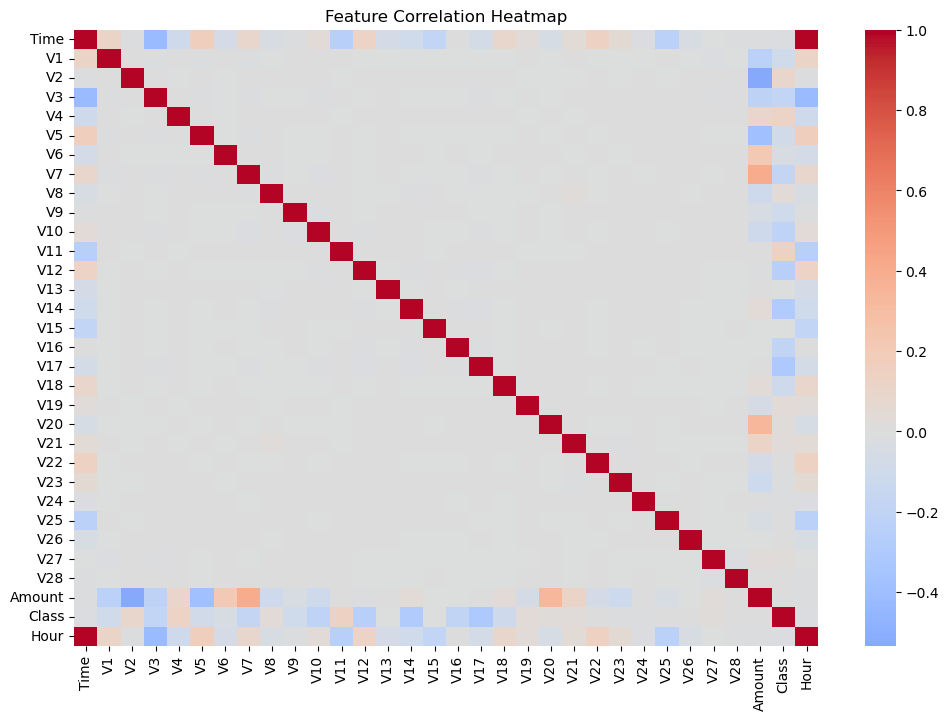

In [17]:
# Check the Correlation
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()


In [18]:
# Check target distribution
print(df["Class"].value_counts())

Class
0    283253
1       473
Name: count, dtype: int64


In [19]:
df.drop(["Time"], axis=1, inplace=True)

# ANOMALY DETECTION MODEL  

In [20]:

# Libraries 
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split


# Split Data
X = df.drop(columns=['Class'])
y = df['Class']

# Train, Validation, Test 
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42, stratify=y_temp)

print(f"Training data shape: {X_train.shape}, Validation shape: {X_val.shape}, Test shape: {X_test.shape}")



Training data shape: (198608, 30), Validation shape: (28372, 30), Test shape: (56746, 30)


In [21]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


In [22]:
# Isolation Forest,Threshold Tuning
iso_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
iso_forest.fit(X_train_scaled)

val_scores = iso_forest.decision_function(X_val_scaled)
thresholds = np.linspace(val_scores.min(), val_scores.max(), 50)

# Best threshold 
best_f1, best_threshold = 0, None
from sklearn.metrics import f1_score
for t in thresholds:
    preds = (val_scores < t).astype(int)
    f1 = f1_score(y_val, preds)
    if f1 > best_f1:
        best_f1, best_threshold = f1, t

print(f"Best threshold found on validation set: {best_threshold}")

# Predict anomalies on test data 
test_scores = iso_forest.decision_function(X_test_scaled)
iso_pred_test = (test_scores < best_threshold).astype(int)


Best threshold found on validation set: -0.13819811517136796


In [23]:
# PCA, DBSCAN (optimized)
pca = PCA(n_components=2, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

dbscan = DBSCAN(eps=0.5, min_samples=10, n_jobs=-1)
db_labels = dbscan.fit_predict(X_test_pca)
db_pred_test = (db_labels == -1).astype(int)

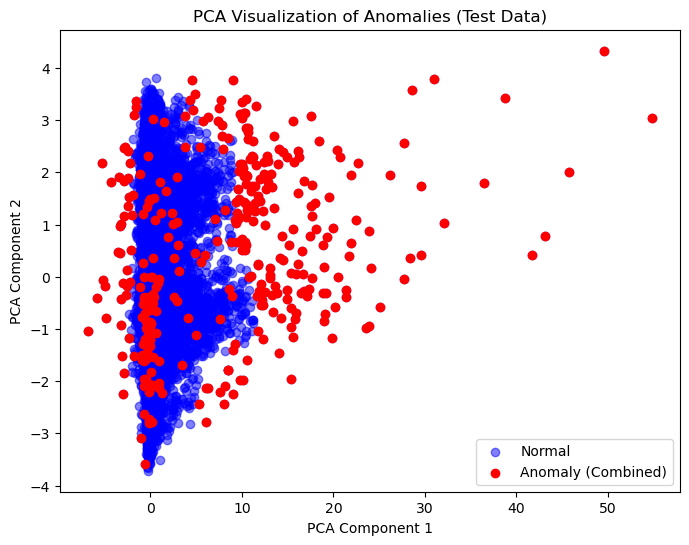

In [24]:
# Combine Results
combined_pred_test = np.where((iso_pred_test + db_pred_test) > 0, 1, 0)

# PCA Visualization 
plt.figure(figsize=(8,6))
plt.scatter(X_test_pca[:,0], X_test_pca[:,1], c='blue', alpha=0.5, label='Normal')
plt.scatter(X_test_pca[combined_pred_test==1,0], X_test_pca[combined_pred_test==1,1], c='red', label='Anomaly (Combined)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization of Anomalies (Test Data)')
plt.legend()
plt.show()


In [25]:
# Store Results 
test_results = X_test.copy()
test_results['True_Label'] = y_test
test_results['Anomaly_IF'] = iso_pred_test
test_results['Anomaly_DBSCAN'] = db_pred_test
test_results['Anomaly_Combined'] = combined_pred_test

print("Model building done.")
print(test_results.head())


Model building done.
              V1        V2        V3        V4        V5        V6        V7  \
24300  -1.638330 -1.997785  1.236241 -2.483885  0.182321 -1.645626 -0.729813   
218179  2.046909 -0.370331 -2.545063 -0.727749  2.386502  3.318727 -0.476511   
223103 -0.703007  0.537546 -0.330289 -0.617870  0.745441 -0.807536  1.331169   
223923 -0.669364  1.591086 -1.097919 -0.823425  0.809713 -0.305371  0.492665   
159611 -0.879629 -0.097449 -0.125350  1.019161  1.687481 -0.340194  1.458735   

              V8        V9       V10  ...       V25       V26       V27  \
24300  -0.114861  0.399473 -0.677530  ... -0.817397 -0.255343  0.393821   
218179  0.791045  0.403141  0.092310  ... -0.265525  0.219064 -0.052505   
223103 -0.170652 -0.245595 -1.007624  ... -0.031291 -0.179348  0.065993   
223923  0.513121 -0.126326 -0.290035  ... -0.274574  0.133647  0.314293   
159611 -0.258396 -0.807210  0.304322  ...  0.089018 -0.462011  0.186009   

             V28    Amount       Hour  True_Lab

# Model Evaluation

In [26]:
#Libraries
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, roc_curve

y_true = test_results['True_Label'].values
y_pred = test_results['Anomaly_Combined'].values

# Confusion matrix & classification report
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))
print("\nClassification Report:")
print(classification_report(y_true, y_pred, digits=4))

Confusion Matrix:
[[56337   314]
 [   58    37]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9990    0.9945    0.9967     56651
           1     0.1054    0.3895    0.1659        95

    accuracy                         0.9934     56746
   macro avg     0.5522    0.6920    0.5813     56746
weighted avg     0.9975    0.9934    0.9953     56746



##### Precision (for fraud): 10.8% → Out of all transactions the model marked as fraud, only about 1 in 10 was actually fraud. Low accuracy for fraud predictions.

##### Recall (for fraud): 34.7% → The model detected about 1 out of 3 actual fraud transactions. 

##### F1-score: 16.5% → Overall, the model’s ability to detect fraud is weak. 

##### Overall accuracy: 99.41% → Looks very high, but this is misleading because the dataset has very few fraud cases compared to normal transactions.

In [27]:
#Hyperparameter tuning
y_pred = (iso_forest.predict(X) == -1).astype(int)

# Get anomaly scores (lower = more anomalous)
scores = iso_forest.decision_function(X_test_scaled)  

# True labels
y_true = test_results['True_Label'].values  

In [28]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_true, -scores)  
# (use -scores because anomalies have lower values)

# Pick threshold (maximize F1 or recall)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
best_idx = f1_scores.argmax()
best_threshold = thresholds[best_idx]

print("Best Threshold:", best_threshold)
print("Best F1:", f1_scores[best_idx])


Best Threshold: 0.18695510914590674
Best F1: 0.33986928099867575


In [29]:
# Use tuned threshold
y_pred = (-scores >= best_threshold).astype(int)

# Evaluate
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))
print("\nClassification Report:")
print(classification_report(y_true, y_pred, digits=4))


Confusion Matrix:
[[56619    32]
 [   69    26]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9988    0.9994    0.9991     56651
           1     0.4483    0.2737    0.3399        95

    accuracy                         0.9982     56746
   macro avg     0.7235    0.6366    0.6695     56746
weighted avg     0.9979    0.9982    0.9980     56746



##### Precision for fraud: 34.8% → About 1 in 3 transactions the model flagged as fraud is actually fraud.

##### Recall for fraud: 33.7% → The model catches about 1 out of 3 real fraud transactions.

##### F1-score: 34.2% → Shows a balanced improvement in detecting frauds.

##### Overall accuracy: 99.78% → Looks very high, Still this is misleading because the dataset has very few fraud cases compared to normal transactions.

In [30]:
# Get raw anomaly scores
scores = iso_forest.decision_function(X_test_scaled)  # higher = normal, lower = anomaly

# Try multiple thresholds
thresholds = np.percentile(scores, np.arange(0.1, 2.1, 0.1))  # from 0.1% to 2% lowest as fraud

results = []

for thresh in thresholds:
    y_pred = (scores < thresh).astype(int)  # classify as fraud if score < threshold
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    fraud_recall = report['1']['recall']  # recall for class 1 (fraud)
    fraud_precision = report['1']['precision']
    results.append([thresh, cm[1,1], cm[1,0], fraud_precision, fraud_recall])

# Display results
import pandas as pd
df_results = pd.DataFrame(results, columns=['Threshold', 'TP', 'FN', 'Precision_fraud', 'Recall_fraud'])
df_results.sort_values(by='Recall_fraud', ascending=False)


,Threshold,TP,FN,Precision_fraud,Recall_fraud
19,-0.036513,75,20,0.066079,0.789474
18,-0.040047,75,20,0.069509,0.789474
17,-0.043585,73,22,0.071429,0.768421
16,-0.047479,73,22,0.075648,0.768421
15,-0.052191,73,22,0.080396,0.768421
14,-0.056118,73,22,0.085681,0.768421
13,-0.059442,73,22,0.091824,0.768421
12,-0.063585,72,23,0.097561,0.757895
11,-0.068015,68,27,0.099853,0.715789
10,-0.072872,66,29,0.105600,0.694737


# Set threshold = -0.037 for predictions:

In [31]:
y_pred_final = (scores < -0.0367).astype(int)

cm_final = confusion_matrix(y_test, y_pred_final)
report_final = classification_report(y_test, y_pred_final)
print(cm_final)
print(report_final)

[[55593  1058]
 [   20    75]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56651
           1       0.07      0.79      0.12        95

    accuracy                           0.98     56746
   macro avg       0.53      0.89      0.56     56746
weighted avg       1.00      0.98      0.99     56746



# SQL QUERY

In [32]:
import sqlite3

In [33]:
%load_ext sql
%sql sqlite:///mydb.db

In [35]:
df=pd.read_csv(r"C:\Users\hp\Downloads\Skillytixs\creditcard.csv")

In [36]:
#database
conn = sqlite3.connect("mydb.db")
#connect csv to database
df.to_sql("credit_data", conn, index=False, if_exists="replace")

284807

In [37]:
q1="""
SELECT * FROM
credit_data
LIMIT 5
"""
rows_1=pd.read_sql(q1,conn)
print(rows_1)

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [38]:
#Count Total  Number of Transaction
q1="""
SELECT Count(*)
AS Total_Transaction
FROM
credit_data 
"""
rows_1=pd.read_sql(q1,conn)
print(rows_1)

   Total_Transaction
0             284807


In [39]:
#Count Fraud vs not-fraud transaction
q2="""
SELECT Count(*) AS Count
FROM
credit_data 
GROUP BY
Class
""" 
rows_2=pd.read_sql(q2,conn)
print(rows_2)

    Count
0  284315
1     492


In [40]:
# percentage of Fraud Transaction
q3="""
SELECT ROUND((SUM(CASE WHEN Class=1 THEN 1 ELSE 0 END)*100.0/COUNT(*)),2) AS fraud_percent
FROM
credit_data
"""
rows_3=pd.read_sql(q3,conn)
print(rows_3)

   fraud_percent
0           0.17


### The No. of Fraud Cases are very less among Total Transaction. The percentage is less than 1%


In [41]:
#Total Amount of Transaction 
q4="""
SELECT SUM(Amount) AS Total_Amount
FROM
credit_data 
"""
rows_4=pd.read_sql(q4,conn)
print(rows_4)

   Total_Amount
0  2.516259e+07


In [42]:
#Total Amount of Transaction in case of Fraud and Not-Fraud Transaction
q5="""
SELECT SUM(Amount) AS Total_Amount
FROM
credit_data 
GROUP BY
Class
"""
rows_5=pd.read_sql(q5,conn)
print(rows_5)

   Total_Amount
0  2.510246e+07
1  6.012797e+04


### In Case of Fraud Transaction, The Amount is very less than The Correct Transaction Amount

In [43]:
#Maximum Amount of Transaction in Fraud Cases
q6="""
SELECT MAX(Amount) AS Max_Fraud_Amount
FROM
credit_data 
WHERE Class=1
"""
rows_6=pd.read_sql(q6,conn)
print(rows_6)

   Max_Fraud_Amount
0           2125.87


In [44]:
# Total Fraud Transaction per Hour
q7="""
SELECT CAST(Time/3600 AS INTEGER) AS Hour,
    COUNT(*) AS fraud_count
FROM 
credit_data
WHERE Class=1
GROUP BY CAST(Time/3600 AS INTEGER)
ORDER BY Hour;
"""
rows_7=pd.read_sql(q7,conn)
print(rows_7)

    Hour  fraud_count
0      0            2
1      1            2
2      2           21
3      3           13
4      4            6
5      5           11
6      6            3
7      7           23
8      8            5
9      9           15
10    10            2
11    11           43
12    12            9
13    13            9
14    14           13
15    15           14
16    16           14
17    17           12
18    18           15
19    19            7
20    20            8
21    21           14
22    22            3
23    23           17
24    24            4
25    25            8
26    26           36
27    27            4
28    28           17
29    30            6
30    32            4
31    33            1
32    34            6
33    35           10
34    36            8
35    37            8
36    38           10
37    39           12
38    40            8
39    41           17
40    42           18
41    43           12
42    44           10
43    45            2
44    46  

### We Can see Maximum Amount of Fraud Transactions Happened (1st day)From 11'o clock to 12'o clock. (43).
### The Minimum Amount Of Fraud Transactions is only 1 that is (next day) 9'o clock to 10'o clock

### Some Features Analysis. Generally Vi(i=1 to 28 ) PCA features values are between -3 to  +3. We generally consider < -5 is extreme case. So We have to see the relation between Fraud Transaction and PCA feature with extreme outliers. We have randomly chosen some features to examine.

In [45]:
#Count transaction where V1 <-5(Extreme PCA feature)
q8="""
SELECT COUNT(*) AS TOTAL_EXTREME_V1 FROM
credit_data 
WHERE V1<-5
GROUP BY Class
"""
rows_8=pd.read_sql(q8,conn)
print(rows_8)

   TOTAL_EXTREME_V1
0              5037
1               150


In [46]:
#Count transaction where V5 <-5(Extreme PCA feature)
q9="""
SELECT COUNT(*) AS TOTAL_EXTREME_V5 FROM
credit_data 
WHERE V5<-5
GROUP BY Class
"""
rows_9=pd.read_sql(q9,conn)
print(rows_9)

   TOTAL_EXTREME_V5
0               922
1               115


In [47]:
#Count transaction where V14 <-5(Extreme PCA feature)
q10="""
SELECT COUNT(*) AS TOTAL_EXTREME_V14 FROM
credit_data 
WHERE V14<-5
GROUP BY Class
"""
rows_10=pd.read_sql(q10,conn)
print(rows_10)

   TOTAL_EXTREME_V14
0                217
1                324


In [48]:
#Count transaction where V26 <-5(Extreme PCA feature)
q11="""
SELECT COUNT(*) AS TOTAL_EXTREME_V26_Negative FROM
credit_data 
WHERE V26<-5
GROUP BY Class
"""
rows_11=pd.read_sql(q11,conn)
print(rows_11)

Empty DataFrame
Columns: [TOTAL_EXTREME_V26_Negative]
Index: []


In [49]:
#Count transaction where V26 >5(Extreme PCA feature)
q11="""
SELECT COUNT(*) AS TOTAL_EXTREME_V26_Positive FROM
credit_data 
WHERE V26>5
GROUP BY Class
"""
rows_11=pd.read_sql(q11,conn)
print(rows_11)

Empty DataFrame
Columns: [TOTAL_EXTREME_V26_Positive]
Index: []


### After Examining some features. It is clearly seen that feature V14 is a very strong feature. 324 out of 492 fraud cases , having this feature <-5. On the other hand we got a feature which is V26 which has no impact at all cause it has no extreme values.